## Final EDA


   - Exclude columns that are `not necessary` 

----------
### Merge all datasets:

   - using `fips`
   - exclude some states - `Puerto Rico` & `Guam` ?
   
----------
### Select features:

   - exclude `overlapping features`
   - exclude columns with `high correlation`
   
----------
### Final EDA:

   - visualise the final features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load datasets:

In [2]:
base = os.path.split(os.getcwd())[0]
dd = base + '/data/clean/'

In [3]:
vacc = pd.read_csv(dd + 'vaccination_rate_US.csv')
cov19 = pd.read_csv(dd + 'covi19_death_cases.csv')
hesit = pd.read_csv(dd + 'Hesitancy_SVI_Ethnicity.csv')
elect = pd.read_csv(dd + 'election_results_us.csv')
pvi_d = pd.read_csv(dd + 'PVI_05_Oct_data_clean.csv')
pvi_m = pd.read_csv(dd + 'PVI_05_Oct_results_clean.csv')
disp = pd.read_csv(dd + 'covid19_heath_disparity.csv' )
cdc = pd.read_csv(dd + 'cdc_90519_DS1.csv')

In [4]:
vacc.Name_df = 'vacc' 
cov19.Name_df = 'cov19'
hesit.Name_df = 'hesit'
elect.Name_df = 'elect'
pvi_d.Name_df = 'pvi_d'
pvi_m.Name_df = 'pvi_m'
disp.Name_df = 'disp'
cdc.Name_df = 'cdc'

datasets = [vacc, cov19, hesit, elect, pvi_d, pvi_m, disp, cdc]

In [5]:
for data in datasets:
    
    if 'fips' in data.columns:
        print('fips codes in {}'.format(data.Name_df))
        print()
    else:
        print('No fips codes in {}'.format(data.Name_df))
        print()

fips codes in vacc

fips codes in cov19

fips codes in hesit

fips codes in elect

fips codes in pvi_d

fips codes in pvi_m

fips codes in disp

No fips codes in cdc



In [6]:
#cdc.columns -> map FIPS to fips

cdc.rename(columns = {'FIPS':'fips'}, inplace = True)

**`fips` in all datasets**

In [7]:
for data in datasets:
    print(data.Name_df)
    print(data.columns.tolist())
    print('Number of variables: ', len(data.columns))
    print()

vacc
['fips', 'state', 'county', 'state_abb', 'popfull_per', 'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per', 'pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per']
Number of variables:  12

cov19
['fips', 'state', 'county', 'state_abb', 'popfull_per', 'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per', 'pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per', 'county_cases', 'cases_031021', 'county_death', 'death_031021', 'pop_census', 'test', 'cases_prop', 'death_prop']
Number of variables:  20

hesit
['fips', 'Estimated hesitant', 'Estimated hesitant or unsure', 'Estimated strongly hesitant', 'Social Vulnerability Index (SVI)', 'SVI Category', 'CVAC level of concern for vaccination rollout', 'CVAC Level Of Concern', 'Percent Hispanic', 'Percent non-Hispanic American Indian/Alaska Native', 'Percent non-Hispanic Asian', 'Percent non-Hispanic Black', 'Percent non-Hispanic Native Hawaii

## Exclude columns that are not necessary:

**`vacc`**:

   - to exclude `'popfull_per','pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per','pop_first_65plus_per'`

In [8]:
vacc.columns

Index(['fips', 'state', 'county', 'state_abb', 'popfull_per',
       'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per',
       'pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per',
       'pop_first_65plus_per'],
      dtype='object')

In [9]:
vacc = vacc.drop(columns = ['popfull_per','pop_first_per', 'pop_first_12plus_per', 
                      'pop_first_18plus_per','pop_first_65plus_per']) #.head(n = 3)

In [29]:
vacc.columns

Index(['fips', 'state', 'county', 'state_abb', 'pop_full_12plus_per',
       'pop_full_18plus_per', 'pop_full_65plus_per'],
      dtype='object')

**`cov19`**:

   - to **include** `'fips', 'cases_prop', 'death_prop', 'pop_census'`

In [11]:
cov19.columns

Index(['fips', 'state', 'county', 'state_abb', 'popfull_per',
       'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per',
       'pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per',
       'pop_first_65plus_per', 'county_cases', 'cases_031021', 'county_death',
       'death_031021', 'pop_census', 'test', 'cases_prop', 'death_prop'],
      dtype='object')

In [12]:
cov19 = cov19[['fips', 'cases_prop', 'death_prop', 'pop_census']] #.head(n = 3)

In [13]:
cov19.columns

Index(['fips', 'cases_prop', 'death_prop', 'pop_census'], dtype='object')

**`hesit`**:

   - to exclude: ``

In [14]:
hesit.columns

Index(['fips', 'Estimated hesitant', 'Estimated hesitant or unsure',
       'Estimated strongly hesitant', 'Social Vulnerability Index (SVI)',
       'SVI Category', 'CVAC level of concern for vaccination rollout',
       'CVAC Level Of Concern', 'Percent Hispanic',
       'Percent non-Hispanic American Indian/Alaska Native',
       'Percent non-Hispanic Asian', 'Percent non-Hispanic Black',
       'Percent non-Hispanic Native Hawaiian/Pacific Islander',
       'Percent non-Hispanic White'],
      dtype='object')

In [ ]:
# hesit = 

**`elect`**:

   - to exclude: ``

In [24]:
elect.columns

Index(['fips', 'state', 'county', 'votes_dem', 'votes_gop', 'total_votes',
       'per_dem', 'per_gop', 'per_point_diff'],
      dtype='object')

In [ ]:
# elect = 

**`pvi_d`**:

   - to exclude: ``

In [25]:
pvi_d.columns

Index(['fips', 'Name', 'Cases', 'Deaths', 'Sick', 'Spread',
       'DaytimePopDensity', 'Traffic', 'SVIHousing', 'Vaccines',
       'DistancingGrade', 'Testing', 'PctBeds', 'PctVentilators', 'PctBlack',
       'PctNative', 'AirPollution', 'PctGE65', 'PrematureDeath', 'Smoking',
       'Diabetes', 'Obesity', 'PctNoIns', 'SVISocioeconomic'],
      dtype='object')

In [29]:
# pvi_d

**`pvi_m`**:

   - to exclude: ``

In [26]:
pvi_m.columns

Index(['ToxPi Score', 'Name', 'Transmissible Cases', 'Disease Spread',
       'Pop Mobility', 'Residential Density', 'Vaccines', 'Social Distancing',
       'Testing', 'Hospital Beds', 'Hospital Ventilators', 'Pop Demographics',
       'Air Pollution', 'Age Distribution', 'Co-morbidities',
       'Health Disparities', 'fips'],
      dtype='object')

In [28]:
# pvi_m = 

**`disp`**:

   - to exclude: `'PopDensity', 'SES', 'Asthma','Cancer', 'COPD', 'Stroke', 'HF', 'HTN', 'KD'`

In [27]:
disp.columns

Index(['fips', 'PopDensity', 'Male', 'RuralCont', 'EconArea', 'HouseholdSize',
       'noHealthInsurance', 'noHighSchool', 'Poverty', 'logPopDensity',
       'PercentEduHealthSoc', 'SES', 'Household', 'HousingType', 'Asthma',
       'Cancer', 'COPD', 'Stroke', 'HF', 'HTN', 'KD', 'WBSeg', 'WNWSeg'],
      dtype='object')

In [20]:
disp = disp.drop(columns = ['PopDensity', 'SES', 'Asthma','Cancer', 'COPD', 'Stroke', 'HF', 'HTN', 'KD'])
#.head(n = 3)

In [21]:
disp.columns

Index(['fips', 'Male', 'RuralCont', 'EconArea', 'HouseholdSize',
       'noHealthInsurance', 'noHighSchool', 'Poverty', 'logPopDensity',
       'PercentEduHealthSoc', 'Household', 'HousingType', 'WBSeg', 'WNWSeg'],
      dtype='object')

**`cdc`**:

   - to exclude: ``

In [22]:
cdc.columns

Index(['COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'fips',
       'county_pop2018_18 and older', 'anycondition_prevalence',
       'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI',
       'anycondition_number', 'Obesity_prevalence', 'Obesity_Lower 95% CI',
       'Obesity_Upper 95% CI', 'Obesity_number', 'Heart disease_prevalence',
       'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
       'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence',
       'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabetes_number',
       'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code', 'STAB'],
      dtype='object')

In [33]:
# cdc = 

-------------------------------------------
## Merge and exclude overlapping features:

In [36]:
# update:
datasets = [vacc, cov19, hesit, elect, pvi_d, pvi_m, disp, cdc]
df = vacc.copy()

for data in datasets[1:]:
    df = pd.merge(df, data, how = 'left', on = 'fips')
    
df.head(n = 3)

,fips,state_x,county_x,state_abb,pop_full_12plus_per,pop_full_18plus_per,pop_full_65plus_per,cases_prop,death_prop,pop_census,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STAB
0,1001,Alabama,Autauga County,AL,39.9,41.8,61.7,17.505235,0.254166,55869.0,...,12.9,11.9,13.8,5462.0,3.1,2.9,3.3,1326.0,3.0,AL
1,1003,Alabama,Baldwin County,AL,49.5,51.9,75.3,16.385945,0.232044,223234.0,...,12.0,11.0,13.1,20520.0,3.2,3.0,3.5,5479.0,4.0,AL
2,1005,Alabama,Barbour County,AL,41.1,43.0,66.1,14.255043,0.287612,24686.0,...,19.7,18.6,20.6,3870.0,4.5,4.2,4.8,887.0,6.0,AL


In [38]:
df.isnull().sum()

fips                    0
state_x                 0
county_x                0
state_abb               0
pop_full_12plus_per    53
                       ..
CKD_Lower 95% CI       79
CKD_Upper 95% CI       79
CKD_number             79
Urban_rural_code       79
STAB                   79
Length: 114, dtype: int64

In [41]:
for col in df.columns:
    print(col)
    print(df[df[col].isnull()]['state_x'].value_counts())
    print('------------')

fips
Series([], Name: state_x, dtype: int64)
------------
state_x
Series([], Name: state_x, dtype: int64)
------------
county_x
Series([], Name: state_x, dtype: int64)
------------
state_abb
Series([], Name: state_x, dtype: int64)
------------
pop_full_12plus_per
Idaho         44
California     8
Alaska         1
Name: state_x, dtype: int64
------------
pop_full_18plus_per
Texas         254
California      8
Name: state_x, dtype: int64
------------
pop_full_65plus_per
California    8
Name: state_x, dtype: int64
------------
cases_prop
Utah             22
Alaska            3
Massachusetts     2
Guam              1
Name: state_x, dtype: int64
------------
death_prop
Puerto Rico      78
Utah             22
Nebraska          9
Alaska            8
California        2
Texas             2
North Dakota      2
Nevada            2
Colorado          2
Massachusetts     2
South Dakota      1
Guam              1
Washington        1
Idaho             1
Minnesota         1
Name: state_x, dtype: int64

------------


## Exclude `Puerto Rico` , `Guam`, `Alaska?`

In [ ]:
df = df.drop(df.loc[df['state'] == 'Puerto Rico'].index)
df = df.drop(df_final.loc[df['state'] == 'Guam'].index) #, inplace = True)

## Exclude columns with high correlation:

### Heatmap:

In [ ]:
#full_corr = df.select_dtypes(include=['float64']).corr(method = 'spearman')
#corr_03 = full_corr.where(-((full_corr < 0.3) & (full_corr > -0.3)))
#corr_04 = full_corr.where(-((full_corr < 0.4) & (full_corr > -0.4)))

In [ ]:
plt.figure(figsize=(28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(full_corr, 
                      cmap = reversed_col, linewidths=.5,
                      linecolor = 'lightgrey')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
print(full_corr[full_corr['pop_full_12plus_per'] > 0.3]['pop_full_12plus_per'])
print(full_corr[full_corr['pop_full_12plus_per'] < -0.3]['pop_full_12plus_per'])

### Individual assoc:

In [ ]:
# sns.pairplot(df.select_dtypes(include=['float64']))

FEATURE:  pop_full_12plus_per


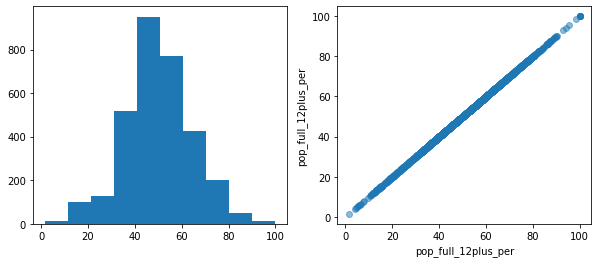

------------



In [59]:
float_col = df.select_dtypes(include=['float64']).columns

for fea in float_col[:1]:
    
    print('FEATURE: ', fea)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(df[fea])
    
    plt.subplot(1,2,2)
    plt.scatter(df[fea], df['pop_full_12plus_per'], alpha = 0.5)
    plt.ylabel('pop_full_12plus_per'); plt.xlabel(fea)
    plt.show()
    print('------------')
    print()
    